## Assignment 4: Exploring Yelp Reviews

#### Shujing Yi
#### 10/29/2022

**NOTE: THIS ASSIGNMENT IS OPTIONAL**

You must complete **one** out of homeworks #4, #5, and #6.

**Due date: Monday, 10/31 by the end of day**

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This assignment is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

You can choose data from Cleveland, Charlotte, or Pittsburgh. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [1]:
import pandas as pd

In [2]:
Review =  pd.read_json ("data/reviews_pittsburgh.json.gz", orient='records', lines=True  )

In [3]:
Review

,business_id,review_id,stars,text
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o..."
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...
...,...,...,...,...
162099,RC8NJlX3X2Eo240PU5zJWA,gwxVdo9rskZCOjUzA4HUrQ,4,It had been 8 years or so since I last found m...
162100,av_-ePHJwSSqMtTQbNoL7g,UqYuguqc-xCOLyg2Nwv1hQ,2,"Once again, I turn up Mid-Afternoon - Once aga..."
162101,KpfCj839-MPcxM8FKkW7GA,fNIktWWjIHHItgD7dEyTHg,3,managed not to mess up order like north hills ...
162102,SmkYLXEYhzwUZdS6TAevHg,lgZc5zUajxWNoUWTd0WMRg,5,Amazing! Drove up from cleveland to try it...n...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [4]:
Review['formatt_text'] = Review['text'].str.lower().str.split()

In [5]:
Review

,business_id,review_id,stars,text,formatt_text
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,"[i'll, be, the, first, to, admit, that, i, was..."
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,"[wow., so, surprised, at, the, one, and, two, ..."
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o...","[if, i, can, give, this, place, no, stars, i, ..."
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...,"[this, place, epitomizes, the, rumored, transf..."
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...,"[here's, why, i, don't, write, reviews, for, c..."
...,...,...,...,...,...
162099,RC8NJlX3X2Eo240PU5zJWA,gwxVdo9rskZCOjUzA4HUrQ,4,It had been 8 years or so since I last found m...,"[it, had, been, 8, years, or, so, since, i, la..."
162100,av_-ePHJwSSqMtTQbNoL7g,UqYuguqc-xCOLyg2Nwv1hQ,2,"Once again, I turn up Mid-Afternoon - Once aga...","[once, again,, i, turn, up, mid-afternoon, -, ..."
162101,KpfCj839-MPcxM8FKkW7GA,fNIktWWjIHHItgD7dEyTHg,3,managed not to mess up order like north hills ...,"[managed, not, to, mess, up, order, like, nort..."
162102,SmkYLXEYhzwUZdS6TAevHg,lgZc5zUajxWNoUWTd0WMRg,5,Amazing! Drove up from cleveland to try it...n...,"[amazing!, drove, up, from, cleveland, to, try..."


### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [6]:
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shuji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop_words = list(set(nltk.corpus.stopwords.words('english')))

stop_words[:10]

['from',
 'because',
 'with',
 'shan',
 'has',
 'hers',
 'don',
 'ourselves',
 'her',
 'd']

In [8]:
import string

In [9]:
punctuation = list(string.punctuation)
punctuation[:5]

['!', '"', '#', '$', '%']

In [10]:
ignored = stop_words + punctuation

In [11]:
ignored[:10]

['from',
 'because',
 'with',
 'shan',
 'has',
 'hers',
 'don',
 'ourselves',
 'her',
 'd']

In [12]:
Review['formatt_text'] = Review['formatt_text'].apply(lambda x: [item for item in x if item not in ignored])

In [13]:
Review

,business_id,review_id,stars,text,formatt_text
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,"[i'll, first, admit, excited, going, la, tavol..."
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,"[wow., surprised, one, two, star, reviews!, st..."
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o...","[give, place, stars, would,, hot, pot, though,..."
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...,"[place, epitomizes, rumored, transformation, p..."
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...,"[here's, write, reviews, chinese, restaurants:..."
...,...,...,...,...,...
162099,RC8NJlX3X2Eo240PU5zJWA,gwxVdo9rskZCOjUzA4HUrQ,4,It had been 8 years or so since I last found m...,"[8, years, since, last, found, curiously, name..."
162100,av_-ePHJwSSqMtTQbNoL7g,UqYuguqc-xCOLyg2Nwv1hQ,2,"Once again, I turn up Mid-Afternoon - Once aga...","[again,, turn, mid-afternoon, place, around, 6..."
162101,KpfCj839-MPcxM8FKkW7GA,fNIktWWjIHHItgD7dEyTHg,3,managed not to mess up order like north hills ...,"[managed, mess, order, like, north, hills, loc..."
162102,SmkYLXEYhzwUZdS6TAevHg,lgZc5zUajxWNoUWTd0WMRg,5,Amazing! Drove up from cleveland to try it...n...,"[amazing!, drove, cleveland, try, it...nothing..."


### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

Add two new columns to the review DataFrame: `polarity` and `subjectivity`.

**Note: the polarity/subjectivity calculation can take several minutes to run**

In [14]:
from textblob import TextBlob

In [15]:
Review['polarity'] = Review['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
Review['subjectivity'] = Review['text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [16]:
Review

,business_id,review_id,stars,text,formatt_text,polarity,subjectivity
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,"[i'll, first, admit, excited, going, la, tavol...",0.238157,0.619437
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,"[wow., surprised, one, two, star, reviews!, st...",0.602879,0.806548
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o...","[give, place, stars, would,, hot, pot, though,...",-0.016005,0.662566
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...,"[place, epitomizes, rumored, transformation, p...",0.266667,0.416667
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...,"[here's, write, reviews, chinese, restaurants:...",0.186174,0.557576
...,...,...,...,...,...,...,...
162099,RC8NJlX3X2Eo240PU5zJWA,gwxVdo9rskZCOjUzA4HUrQ,4,It had been 8 years or so since I last found m...,"[8, years, since, last, found, curiously, name...",0.083679,0.454916
162100,av_-ePHJwSSqMtTQbNoL7g,UqYuguqc-xCOLyg2Nwv1hQ,2,"Once again, I turn up Mid-Afternoon - Once aga...","[again,, turn, mid-afternoon, place, around, 6...",0.107576,0.483550
162101,KpfCj839-MPcxM8FKkW7GA,fNIktWWjIHHItgD7dEyTHg,3,managed not to mess up order like north hills ...,"[managed, mess, order, like, north, hills, loc...",-0.175000,0.175000
162102,SmkYLXEYhzwUZdS6TAevHg,lgZc5zUajxWNoUWTd0WMRg,5,Amazing! Drove up from cleveland to try it...n...,"[amazing!, drove, cleveland, try, it...nothing...",0.539394,0.692424


### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
Review['stars_c'] = Review['stars'].astype('category')

In [19]:
Review

,business_id,review_id,stars,text,formatt_text,polarity,subjectivity,stars_c
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,"[i'll, first, admit, excited, going, la, tavol...",0.238157,0.619437,4
1,FxLfqxdYPA6Z85PFKaqLrg,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,"[wow., surprised, one, two, star, reviews!, st...",0.602879,0.806548,4
2,9nTF596jDvBBia2EXXiOOg,1daGBpea0sleayFeeXuoYw,1,"if i can give this place no stars i would, i o...","[give, place, stars, would,, hot, pot, though,...",-0.016005,0.662566,1
3,sMzNLdhJZGzYirIWt-fMAg,RLbWoIri29BcQ8yjzsvQLQ,5,This place epitomizes the rumored transformati...,"[place, epitomizes, rumored, transformation, p...",0.266667,0.416667,5
4,hcFSc0OHgZJybnjQBrL_8Q,vAckaF8n0KKJeqHOnb1ayw,4,Here's why I don't write reviews for Chinese r...,"[here's, write, reviews, chinese, restaurants:...",0.186174,0.557576,4
...,...,...,...,...,...,...,...,...
162099,RC8NJlX3X2Eo240PU5zJWA,gwxVdo9rskZCOjUzA4HUrQ,4,It had been 8 years or so since I last found m...,"[8, years, since, last, found, curiously, name...",0.083679,0.454916,4
162100,av_-ePHJwSSqMtTQbNoL7g,UqYuguqc-xCOLyg2Nwv1hQ,2,"Once again, I turn up Mid-Afternoon - Once aga...","[again,, turn, mid-afternoon, place, around, 6...",0.107576,0.483550,2
162101,KpfCj839-MPcxM8FKkW7GA,fNIktWWjIHHItgD7dEyTHg,3,managed not to mess up order like north hills ...,"[managed, mess, order, like, north, hills, loc...",-0.175000,0.175000,3
162102,SmkYLXEYhzwUZdS6TAevHg,lgZc5zUajxWNoUWTd0WMRg,5,Amazing! Drove up from cleveland to try it...n...,"[amazing!, drove, cleveland, try, it...nothing...",0.539394,0.692424,5


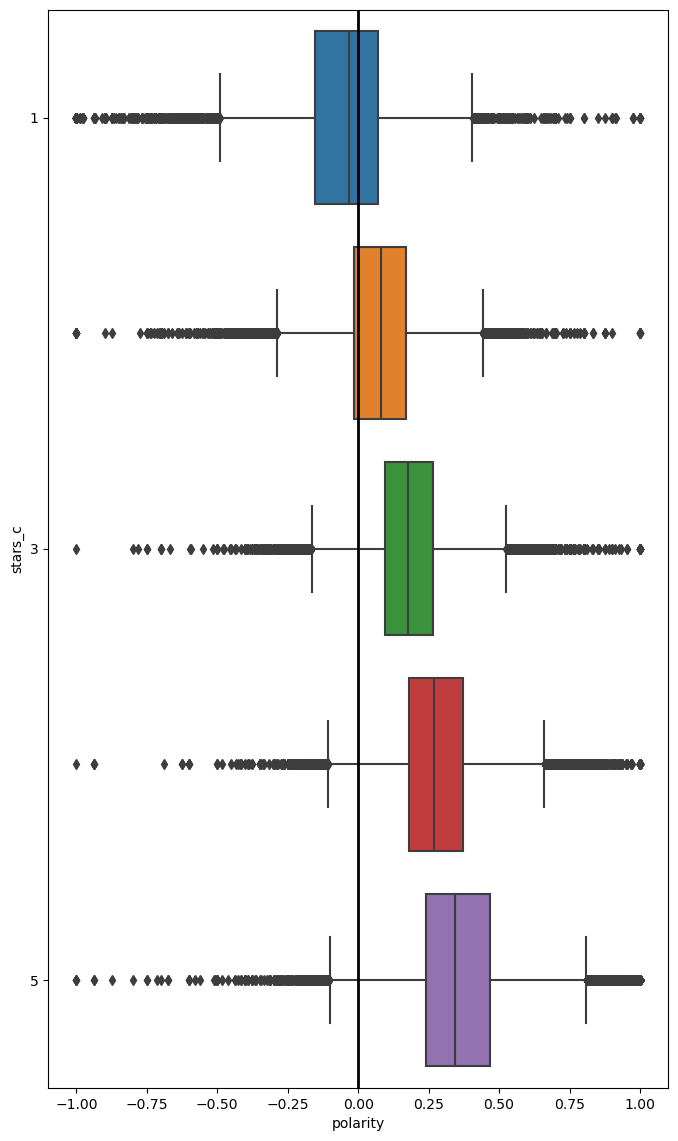

In [20]:
fig, ax = plt.subplots(figsize=(8, 14))

sns.boxplot(y='stars_c', x='polarity', data=Review, ax=ax)
ax.axvline(x=0, c='k', lw=2) # neutral

# Set yticks to every other hour
yticks = ax.get_yticks()
ax.set_yticks(range(0, len(yticks), 2))
plt.setp(ax.get_yticklabels(), fontsize=10);

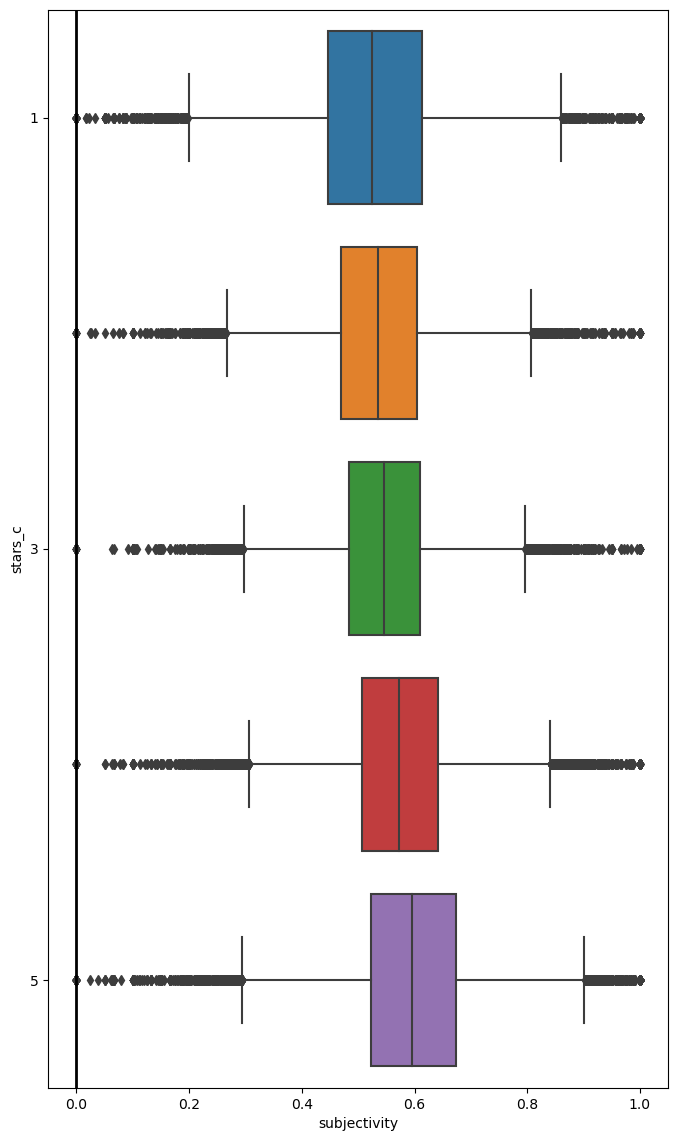

In [21]:
fig, ax = plt.subplots(figsize=(8, 14))

sns.boxplot(y='stars_c', x='subjectivity', data=Review, ax=ax)
ax.axvline(x=0, c='k', lw=2) # neutral

# Set yticks to every other hour
yticks = ax.get_yticks()
ax.set_yticks(range(0, len(yticks), 2))
plt.setp(ax.get_yticklabels(), fontsize=10);

**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

The sentiment analysis reflects people's ratings effectively. The stars are higher when the polarity and subjectivity are higher, indicating customers are more personally involved and have more positive opinions.

### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [22]:
Review_sample = Review.sample(1000)

In [23]:
Review_sample

,business_id,review_id,stars,text,formatt_text,polarity,subjectivity,stars_c
148886,KpfCj839-MPcxM8FKkW7GA,W5MYRG8_-g2oJAb6LaUR0w,2,Let me now tell you the story of Taco Bell on ...,"[let, tell, story, taco, bell, noblestown, roa...",0.074013,0.437533,2
40363,czJKX4DmZR_1JeRmPcnmbQ,OCmk34vMok3mNk3jIsZsmw,4,Recommended by a friend.\nAnd WOW!\n$2 taco w/...,"[recommended, friend., wow!, $2, taco, w/, gen...",0.201563,0.912500,4
62728,__sXvAzVGUsK6AyzT19v6g,onqkZfryNc72Fp2SkXozTA,1,Diner beware! Owner is extremely rude and unpl...,"[diner, beware!, owner, extremely, rude, unple...",-0.179327,0.542491,1
28110,woXlprCuowrLJswWere3TQ,WqehCqhfbdV5IRP_Tj4Ogw,4,We kept hearing about Tako and every time I ca...,"[kept, hearing, tako, every, time, called, try...",0.233828,0.623244,4
65891,l1JDX-o0wCLykuh78R8Kng,r0VgggX4JTKK3fR5wOhAFQ,4,"I love a lot of things about Pittsburgh, but o...","[love, lot, things, pittsburgh,, one, favorite...",0.190341,0.614394,4
...,...,...,...,...,...,...,...,...
22080,J9f-9Prw2YVM-fiZqv2fmQ,qfAkPcpydf6CVbjzyNrD1A,1,A less-than-hygienic caricature of George Cost...,"[less-than-hygienic, caricature, george, costa...",0.177307,0.452455,1
3233,sMzNLdhJZGzYirIWt-fMAg,Td9cr19OiQox1KLzY5mlVQ,4,Interesting concept... the focus is on the mea...,"[interesting, concept..., focus, meatballs, ev...",0.142857,0.510714,4
65928,gZCpY4tmSctmHkvPipp3wg,PmxVypD1ORmvkNLa9RceTw,5,I have been looking for true Caribbean food an...,"[looking, true, caribbean, food, boy, seems, h...",0.337984,0.507798,5
131251,nZDIrGshkfLZf6ImQtAasQ,XYKZ8JrMoK8mMYpwMfeh1g,4,The Mt. Lebanon Saloon is such a happy hangout...,"[mt., lebanon, saloon, happy, hangout, entire,...",0.200203,0.557523,4


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [24]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatt_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [25]:
Reshape = reshape_data(Review_sample)

In [26]:
Reshape

,polarity,stars,review_id,word
0,0.243506,5,z8cjQKl2pnw7TXL9XYswSQ,first
1,0.243506,5,z8cjQKl2pnw7TXL9XYswSQ,time
2,0.243506,5,z8cjQKl2pnw7TXL9XYswSQ,seemed
3,0.243506,5,z8cjQKl2pnw7TXL9XYswSQ,bit
4,0.243506,5,z8cjQKl2pnw7TXL9XYswSQ,missing
...,...,...,...,...
62902,-0.185000,1,6zP_8zpZNSvwCb6BQ6-KzA,scene
62903,-0.185000,1,6zP_8zpZNSvwCb6BQ6-KzA,"grows,"
62904,-0.185000,1,6zP_8zpZNSvwCb6BQ6-KzA,there's
62905,-0.185000,1,6zP_8zpZNSvwCb6BQ6-KzA,options


**Question:** what is the operation performed by the `reshape_data()` function?

The function separates each word and its related review_id, polarity and stars from the samples.

#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  

**Hint:** you can combine the three results using either the `pandas.concat()` or the `pandas.merge()` function.

In [27]:
size = Reshape.groupby(['word']).size()

In [28]:
mean_stars = Reshape.groupby(['word'])['stars'].mean()

In [29]:
mean_polar = Reshape.groupby(['word'])['polarity'].mean()

In [30]:
combined = pd.concat([size, mean_stars, mean_polar], axis="columns")
combined.set_axis(['size', 'stars', 'polarity'], axis='columns', inplace=True)
combined

,size,stars,polarity
word,,,
!!,4,4.0,0.264167
!!!,5,4.2,0.198720
!!!!,3,5.0,0.659000
!!!!!,1,5.0,0.282143
"""$""",1,1.0,-0.009935
...,...,...,...
zoom,1,5.0,0.407445
zucchini,5,3.8,0.275000
"zurek,",1,5.0,0.158831


#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [31]:
combined_trimmed = combined.loc[combined['size']>=50]
combined_trimmed = combined_trimmed.reset_index()
combined_trimmed

,word,size,stars,polarity
0,2,71,3.140845,0.161126
1,actually,63,3.285714,0.153577
2,again.,60,3.183333,0.195000
3,almost,51,3.333333,0.133234
4,also,262,3.809160,0.237963
...,...,...,...,...
191,well,84,3.988095,0.220533
192,well.,58,3.896552,0.201775
193,went,145,3.496552,0.172542
194,worth,65,3.846154,0.218065


#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 

Make sure the figure is big enough so that you can make out some of the words, especially at low and high polarity values. You should be able to see a strong trend between polarity and user stars, and some of the most common words occurring in these reviews. 

In [33]:
import numpy as np

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


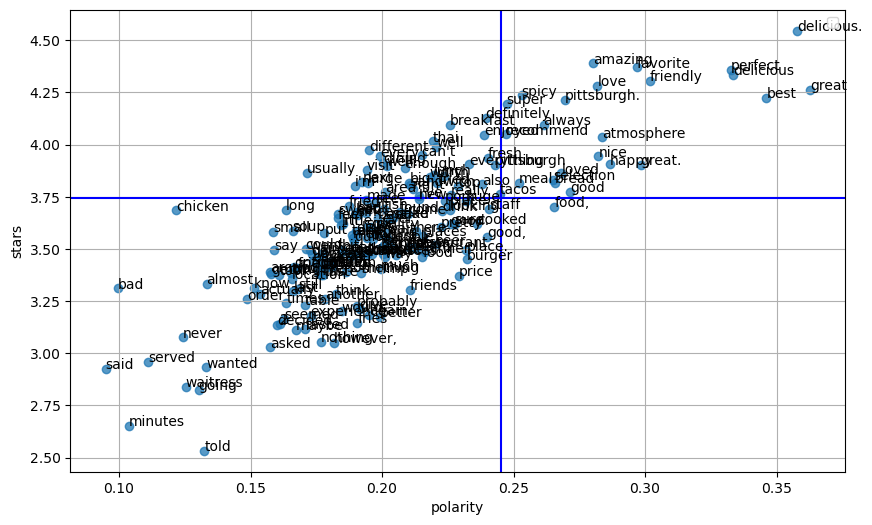

In [34]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))


plt.scatter(combined_trimmed["polarity"],
        combined_trimmed["stars"],
        marker="o",
        alpha=0.75,
           
    )

plt.axhline(y=np.mean(Review['stars']),  color='b')
plt.axvline(x=np.mean(Review['polarity']),  color='b')

for i, row in combined_trimmed.iterrows():
    plt.text(combined_trimmed["polarity"][i],
        combined_trimmed["stars"][i], combined_trimmed["word"][i])

# Format the axes
ax.legend(loc="best")
ax.set_xlabel("polarity")
ax.set_ylabel("stars")
ax.grid(True)

# Show
plt.show()

## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2020 ACS 5-year data set for your county of interest.

You have two options to find the correct variable names:
- Search through: https://api.census.gov/data/2020/acs/acs5/variables.html
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.

**Hints**

The FIPS codes for the various state/counties are: 

- Pittsburgh
    - PA code: '42'
    - County code: '003' (Allegheny County)
- Cleveland
    - OH code: '39'
    - County code: '035' (Cuyahoga County)
- Charlotte
    - NC code: '37'
    - County code: '119' (Mecklenburg County)

In [35]:
# First step: import cenpy
import cenpy

In [36]:
acs = cenpy.remote.APIConnection("ACSDT5Y2020")

In [37]:
median_income =acs.varslike("MEDIAN HOUSEHOLD INCOME", by='concept').sort_index() # searches along concept column
median_income

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B19013A_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013A,0,NaN,NaN,"B19013A_001EA,B19013A_001M,B19013A_001MA",NaN
B19013B_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013B,0,NaN,NaN,"B19013B_001EA,B19013B_001M,B19013B_001MA",NaN
B19013C_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013C,0,NaN,NaN,"B19013C_001EA,B19013C_001M,B19013C_001MA",NaN
B19013D_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013D,0,NaN,NaN,"B19013D_001EA,B19013D_001M,B19013D_001MA",NaN
B19013E_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013E,0,NaN,NaN,"B19013E_001EA,B19013E_001M,B19013E_001MA",NaN
B19013F_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013F,0,NaN,NaN,"B19013F_001EA,B19013F_001M,B19013F_001MA",NaN
B19013G_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013G,0,NaN,NaN,"B19013G_001EA,B19013G_001M,B19013G_001MA",NaN
B19013H_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013H,0,NaN,NaN,"B19013H_001EA,B19013H_001M,B19013H_001MA",NaN
B19013I_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013I,0,NaN,NaN,"B19013I_001EA,B19013I_001M,B19013I_001MA",NaN
B19013_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013,0,NaN,NaN,"B19013_001EA,B19013_001M,B19013_001MA",NaN


In [38]:
variables = [
    "NAME",
    "B19013_001E"
]

In [39]:
Pittsburgh = acs.query(
    cols=variables,
    geo_unit="tract:*",
    geo_filter={"state": "42", 
                "county": "003"
                },
)


Pittsburgh

,NAME,B19013_001E,state,county,tract
0,"Census Tract 4110.01, Allegheny County, Pennsy...",211484,42,003,411001
1,"Census Tract 4110.02, Allegheny County, Pennsy...",103542,42,003,411002
2,"Census Tract 4120.02, Allegheny County, Pennsy...",152440,42,003,412002
3,"Census Tract 4120.03, Allegheny County, Pennsy...",152734,42,003,412003
4,"Census Tract 4120.04, Allegheny County, Pennsy...",119861,42,003,412004
...,...,...,...,...,...
389,"Census Tract 9810, Allegheny County, Pennsylvania",-666666666,42,003,981000
390,"Census Tract 9811, Allegheny County, Pennsylvania",-666666666,42,003,981100
391,"Census Tract 9812, Allegheny County, Pennsylvania",-666666666,42,003,981200
392,"Census Tract 9818, Allegheny County, Pennsylvania",-666666666,42,003,981800


In [40]:
len(Pittsburgh)

394

In [41]:
for variable in variables:
    
    # Convert all variables EXCEPT for NAME
    if variable != "NAME":
        Pittsburgh[variable] = Pittsburgh[variable].astype(float)

### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `cenpy` to set the correct map service and download census tracts for the desired geography
- Merge the downloaded census tracts with the household income DataFrame, making sure to specify the proper columns to perform the merge on.

In [42]:
acs.set_mapservice("tigerWMS_Census2020")

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2020)
With MapServer: Census 2020 WMS

In [43]:
acs.mapservice.layers

[(ESRILayer) Urban Growth Areas,
 (ESRILayer) Urban Growth Areas Labels,
 (ESRILayer) Tribal Census Tracts,
 (ESRILayer) Tribal Census Tracts Labels,
 (ESRILayer) Tribal Block Groups,
 (ESRILayer) Tribal Block Groups Labels,
 (ESRILayer) Census Tracts,
 (ESRILayer) Census Tracts Labels,
 (ESRILayer) Census Block Groups,
 (ESRILayer) Census Block Groups Labels,
 (ESRILayer) Census Blocks,
 (ESRILayer) Census Blocks Labels,
 (ESRILayer) Unified School Districts,
 (ESRILayer) Unified School Districts Labels,
 (ESRILayer) Secondary School Districts,
 (ESRILayer) Secondary School Districts Labels,
 (ESRILayer) Elementary School Districts,
 (ESRILayer) Elementary School Districts Labels,
 (ESRILayer) Estates,
 (ESRILayer) Estates Labels,
 (ESRILayer) County Subdivisions,
 (ESRILayer) County Subdivisions Labels,
 (ESRILayer) Subbarrios,
 (ESRILayer) Subbarrios Labels,
 (ESRILayer) Consolidated Cities,
 (ESRILayer) Consolidated Cities Labels,
 (ESRILayer) Incorporated Places,
 (ESRILayer) Inco

In [44]:
census_tracts_geoservice = acs.mapservice.layers[6]
census_tracts_geoservice

(ESRILayer) Census Tracts

In [45]:
import esri2gpd

In [46]:
# Only Pittsburgh
where_clause = "STATE = '42' AND COUNTY = '003'"

# Query
Pitts_cencus_tracts = esri2gpd.get(census_tracts_geoservice._baseurl, where=where_clause)

In [47]:
Pitts_cencus_tracts.head()

,geometry,OBJECTID,AREALAND,ALANDHIST,AREAWATER,AWATERHIST,COUNTY,EFFDATE,ESTABDATE,FUNCSTAT,...,UR,VINTAGE,CENTLON,CENTLAT,INTPTLON,INTPTLAT,HU100,POP100,STGEOMETRY.AREA,STGEOMETRY.LEN
0,"POLYGON ((-80.01783 40.49735, -80.01787 40.497...",50,1957399,1957399,0,0,003,1.577837e+12,1.568730e+12,S,...,None,70,-080.0059004,+40.4860050,-080.0059004,+40.4860050,1076,2767,3.387423e+06,12632.620650
1,"POLYGON ((-79.90955 40.45669, -79.90944 40.456...",722,1277523,1277523,0,0,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.8947061,+40.4593486,-079.8856510,+40.4573260,1309,2231,2.209114e+06,9968.200414
2,"POLYGON ((-79.91130 40.44715, -79.91144 40.446...",723,1396263,1396263,0,0,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.9000103,+40.4411678,-079.8969935,+40.4452265,1928,4007,2.413135e+06,12271.847145
3,"POLYGON ((-79.87202 40.41257, -79.87197 40.412...",728,2584742,2584742,158463,158463,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.8571281,+40.4010706,-079.8537042,+40.4017394,1278,2247,4.735428e+06,12629.357838
4,"POLYGON ((-79.97096 40.40342, -79.97093 40.403...",734,6565373,6565373,20848,20848,003,1.577837e+12,1.568730e+12,S,...,None,70,-079.9394841,+40.3909315,-079.9555215,+40.3994999,579,1238,1.136601e+07,27448.279621


In [48]:
Pittsburgh_final = Pitts_cencus_tracts.merge(
    Pittsburgh,
    left_on=["STATE", "COUNTY", "TRACT"],
    right_on=["state", "county", "tract"],
)

len(Pittsburgh_final)

394

In [49]:
Pittsburgh_final_trim = Pittsburgh_final.loc[Pittsburgh_final['B19013_001E']>=0]
len(Pittsburgh_final_trim)

379

### 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

In [50]:
Pittsburgh_final_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

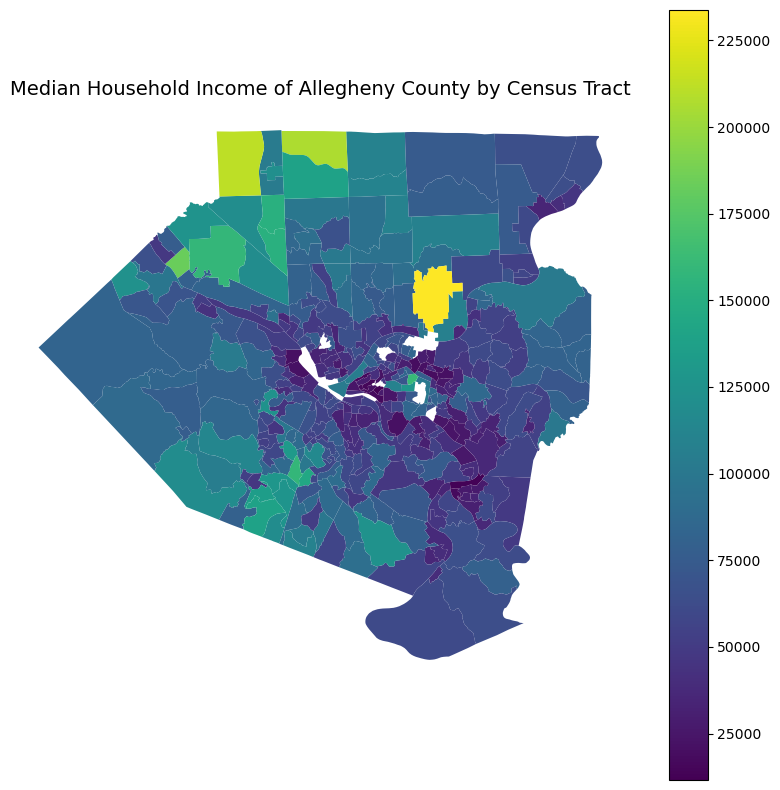

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot the choropleth
Pittsburgh_final_trim.plot(ax=ax, column='B19013_001E', legend=True)

# Format
ax.set_title("Median Household Income of Allegheny County by Census Tract", fontsize=14)
ax.set_axis_off()

### 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [52]:
restaurant = pd.read_json("data/restaurants_pittsburgh.json.gz",orient='records',lines=True  )

In [53]:
restaurant

,business_id,latitude,longitude,name,review_count,stars
0,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0
1,dQj5DLZjeDK3KFysh1SYOQ,40.465694,-79.949324,Apteka,242,4.5
2,v-scZMU6jhnmV955RSzGJw,40.441062,-80.002126,No. 1 Sushi Sushi,106,4.5
3,t-6tdxRaz7s9a0sf94Tguw,40.462345,-79.924165,Impressionz,29,4.5
4,5WMIvoMx3l1vn1uJ3HZB6Q,40.442863,-79.996412,Subway,3,3.0
...,...,...,...,...,...,...
2448,mmvVocwFHyzNbCtYd1EH4w,40.437558,-79.922820,Aji Picante,37,3.5
2449,4revUiH2pE65iffL13LNMQ,40.428430,-79.975009,The Bar 2132,6,3.0
2450,8c2ObImjXJ9pW0hUccL35A,40.334671,-79.947272,Arby's,5,3.5
2451,CzqGem5OaPAk10bQK4bzbg,40.338999,-80.052226,DeLallo's Fort Couch Cafe,64,4.0


In [54]:
import geopandas as gpd

In [55]:
restaurant = restaurant.dropna(subset=['latitude', 'longitude']) 

In [56]:
restaurant['Coordinates'] = gpd.points_from_xy(restaurant['longitude'], restaurant['latitude'])

In [57]:
restaurant = gpd.GeoDataFrame(restaurant, 
                            geometry="Coordinates", 
                            crs="EPSG:4326")

In [58]:
restaurant

,business_id,latitude,longitude,name,review_count,stars,Coordinates
0,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618)
1,dQj5DLZjeDK3KFysh1SYOQ,40.465694,-79.949324,Apteka,242,4.5,POINT (-79.94932 40.46569)
2,v-scZMU6jhnmV955RSzGJw,40.441062,-80.002126,No. 1 Sushi Sushi,106,4.5,POINT (-80.00213 40.44106)
3,t-6tdxRaz7s9a0sf94Tguw,40.462345,-79.924165,Impressionz,29,4.5,POINT (-79.92417 40.46235)
4,5WMIvoMx3l1vn1uJ3HZB6Q,40.442863,-79.996412,Subway,3,3.0,POINT (-79.99641 40.44286)
...,...,...,...,...,...,...,...
2448,mmvVocwFHyzNbCtYd1EH4w,40.437558,-79.922820,Aji Picante,37,3.5,POINT (-79.92282 40.43756)
2449,4revUiH2pE65iffL13LNMQ,40.428430,-79.975009,The Bar 2132,6,3.0,POINT (-79.97501 40.42843)
2450,8c2ObImjXJ9pW0hUccL35A,40.334671,-79.947272,Arby's,5,3.5,POINT (-79.94727 40.33467)
2451,CzqGem5OaPAk10bQK4bzbg,40.338999,-80.052226,DeLallo's Fort Couch Cafe,64,4.0,POINT (-80.05223 40.33900)


### 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

You can use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

**Hint**

You can use the `.geometry.total_bounds` attribute to get the axes limits of the county's census tracts. 

```python
[xmin, ymin, xmax, ymax] = income.geometry.total_bounds
```

You can then use these limits to set the matplotlib plot limits accordingly.

In [59]:
Pittsburgh_final.geometry.total_bounds

array([-80.360902,  40.194285, -79.688975,  40.674935])

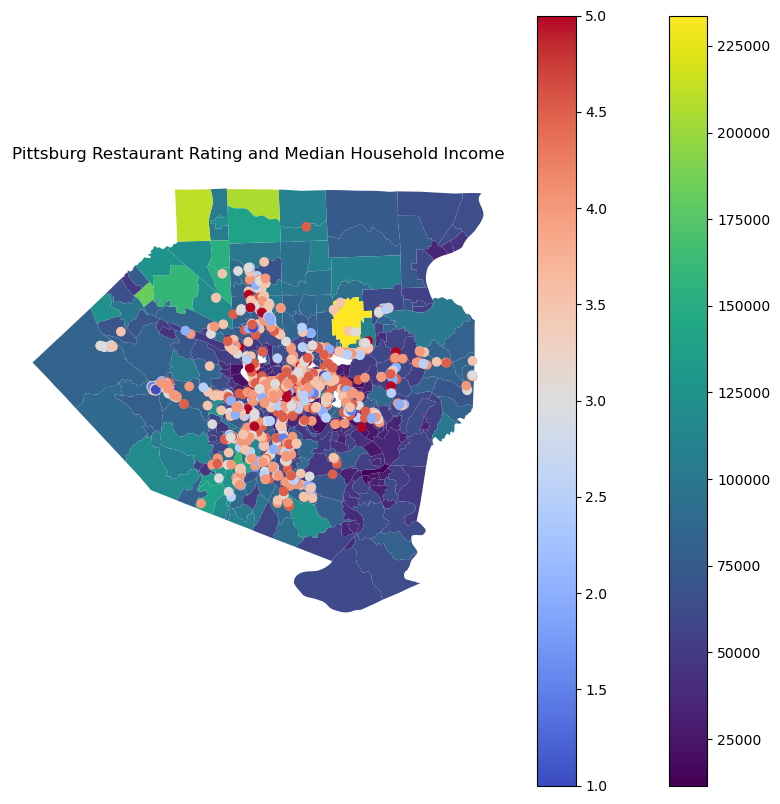

In [60]:
# Initialize
fig, ax = plt.subplots(figsize=(10,10))

# Plot the choropleth
Pittsburgh_final_trim.plot(ax=ax, column='B19013_001E', legend=True)

# Plot restaurants
restaurant.plot(column='stars', legend=True, ax=ax, cmap='coolwarm')

# Format
ax.set_title("Pittsburg Restaurant Rating and Median Household Income", fontsize=12)
ax.set_axis_off()

### 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars

As we saw in Section 1, you should see strong correlation between the two subplots. 

**Hints**
- The 'business_id' column should be present in both the data frames holding review data and restaurant data.
- See the `plt.subplots()` function for creating a figure with 2 subplots.


In [61]:
import numpy as np

In [62]:
Review_res = restaurant.merge (Review , on= 'business_id')

In [63]:
Review_res

,business_id,latitude,longitude,name,review_count,stars_x,Coordinates,review_id,stars_y,text,formatt_text,polarity,subjectivity,stars_c
0,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618),PaPQzyr6chg_eo_u4mw0Dw,5,"Marathon Diner may not look fancy, but I had t...","[marathon, diner, may, look, fancy,, best, air...",0.311607,0.590516,5
1,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618),hpV7n-LmphR56l3YKVshiw,2,What a ripoff. For a $13 salad all you get is ...,"[ripoff., $13, salad, get, iceberg, lettuce,, ...",0.066667,0.433333,2
2,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618),MPmKK0e8zuOjjae2hr-YJg,5,This experience was a joy. The food was great....,"[experience, joy., food, great., service, grea...",0.375000,0.481250,5
3,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618),EJDXWWLfY3bWI-b4K1Bnxw,1,The one at the airport is just ... bad the ser...,"[one, airport, ..., bad, servers, bored, attit...",-0.465000,0.728889,1
4,1RHY4K3BD22FK7Cfftn8Mg,40.496177,-80.246011,Marathon Diner,35,4.0,POINT (-80.24601 40.49618),J9569hRV3zEWoYHosHZ6AA,5,Had an early flight and wife and I were hungr...,"[early, flight, wife, hungry., noticed, marath...",0.366667,0.350000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162099,2XZ4g_ps_H55CmxFs4Pu8A,40.486924,-79.891602,Chili's,39,2.5,POINT (-79.89160 40.48692),8EhBhoLWN9wx5edD9TeyFA,2,Clean establishment. Close to work. Ample park...,"[clean, establishment., close, work., ample, p...",0.257602,0.430117,2
162100,2XZ4g_ps_H55CmxFs4Pu8A,40.486924,-79.891602,Chili's,39,2.5,POINT (-79.89160 40.48692),3M73iRiPU-F7xlPZgVv1GA,3,I was missing the Chili's back in Massachusett...,"[missing, chili's, back, massachusetts, used, ...",0.109318,0.547302,3
162101,2XZ4g_ps_H55CmxFs4Pu8A,40.486924,-79.891602,Chili's,39,2.5,POINT (-79.89160 40.48692),1I9ZsHCINOC4b37-OGw_DQ,2,"Usually the service at Chili's is decent, but ...","[usually, service, chili's, decent,, today, sp...",-0.118939,0.529437,2
162102,2XZ4g_ps_H55CmxFs4Pu8A,40.486924,-79.891602,Chili's,39,2.5,POINT (-79.89160 40.48692),XbOSmfpUZgBEeHEU7ll5Bg,3,I'm not a fan of chain restaurants and I've no...,"[i'm, fan, chain, restaurants, i've, chilli's,...",0.513636,0.612121,3


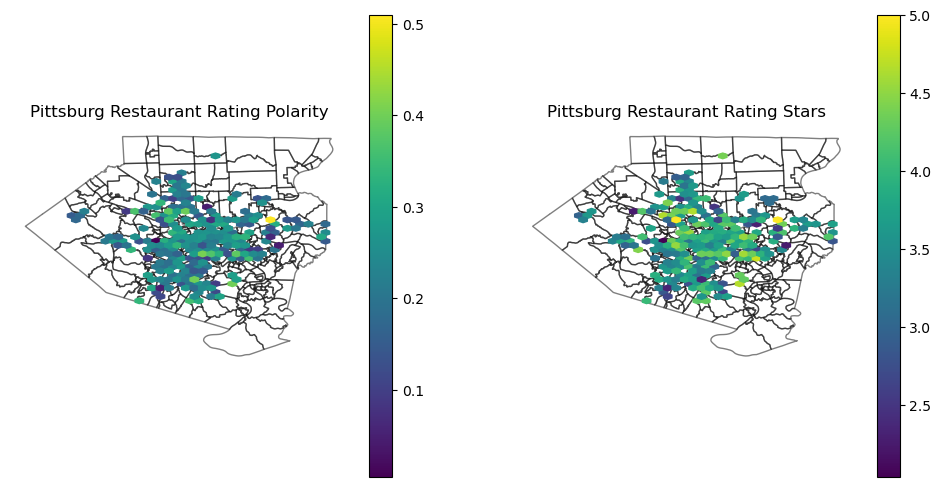

In [64]:
# Create the axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# Add census tract boundaries
Pittsburgh_final_trim.plot(ax=ax1, facecolor="none", edgecolor="black", linewidth=1, alpha=0.5)
Pittsburgh_final_trim.plot(ax=ax2, facecolor="none", edgecolor="black", linewidth=1, alpha=0.5)

# Use the .x and .y attributes
# NOTE: we are passing in the raw point values here! 
# Matplotlib is doing the binning and aggregation work for us!
xcoords = Review_res.Coordinates.x
ycoords = Review_res.Coordinates.y
hex_vals1 = ax1.hexbin(
    xcoords, 
    ycoords,
    C=Review_res.polarity ,
    reduce_C_function=np.mean,
    #bins="log",
    gridsize=30,
)
hex_vals2 = ax2.hexbin(
    xcoords, 
    ycoords,
    C=Review_res.stars_y ,
    reduce_C_function=np.mean,
    #bins="log",
    gridsize=30,
)



# Add a colorbar and format
cbar1 = fig.colorbar(hex_vals1, ax=ax1)
ax1.set_title("Pittsburg Restaurant Rating Polarity", fontsize=12)
ax1.set_axis_off()
ax1.set_aspect("equal")
cbar2 = fig.colorbar(hex_vals2, ax=ax2)
ax2.set_title("Pittsburg Restaurant Rating Stars", fontsize=12)
ax2.set_axis_off()
ax2.set_aspect("equal")
